In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import classification_report

In [ ]:
data_taken = pd.read_csv("/content/drive/MyDrive/Intern/dataset_fixed length_200/data_MITBH_BIDMC.csv",index_col=0)
#data_taken=data_taken.fillna(0)
print(data_taken.head())
data_taken.shape

   Label        c0        c1        c2        c3        c4        c5  \
0      1  0.022046  0.017405  0.010760  0.001513 -0.007137 -0.014390   
1      1 -0.099643 -0.096753 -0.095858 -0.097558 -0.104053 -0.112743   
2      1 -0.059251 -0.060124 -0.057798 -0.054673 -0.051749 -0.048826   
3      1 -0.086089 -0.087316 -0.090945 -0.094777 -0.099811 -0.103447   
4      1 -0.082967 -0.085662 -0.087957 -0.089651 -0.092145 -0.094438   

         c6        c7        c8  ...      c190      c191      c192      c193  \
0 -0.019444 -0.022701 -0.023760  ... -0.213495 -0.198750 -0.186799 -0.176441   
1 -0.122429 -0.131110 -0.136586  ... -0.162969 -0.143016 -0.124065 -0.106114   
2 -0.049305 -0.055384 -0.064865  ... -0.185259 -0.173037 -0.160016 -0.145398   
3 -0.106085 -0.107526 -0.108768  ... -0.183298 -0.168998 -0.152698 -0.134198   
4 -0.097330 -0.100822 -0.105714  ... -0.166520 -0.145839 -0.122554 -0.100068   

       c194      c195      c196      c197      c198      c199  
0 -0.166878 -0.158109 

(16883, 201)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    8454
1    8429
Name: Label, dtype: int64

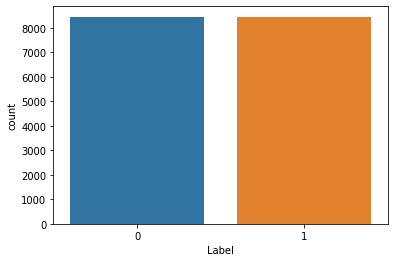

In [ ]:
y = data_taken.Label
X = data_taken.drop('Label', axis=1)
g = sns.countplot(y)
y.value_counts()

In [ ]:
y

0        1
1        1
2        1
3        1
4        1
        ..
16878    0
16879    0
16880    0
16881    0
16882    0
Name: Label, Length: 16883, dtype: int64

In [ ]:
X

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c190,c191,c192,c193,c194,c195,c196,c197,c198,c199
0,0.022046,0.017405,0.010760,0.001513,-0.007137,-0.014390,-0.019444,-0.022701,-0.023760,-0.025621,...,-0.213495,-0.198750,-0.186799,-0.176441,-0.166878,-0.158109,-0.146933,-0.134152,-0.121165,-0.109772
1,-0.099643,-0.096753,-0.095858,-0.097558,-0.104053,-0.112743,-0.122429,-0.131110,-0.136586,-0.138057,...,-0.162969,-0.143016,-0.124065,-0.106114,-0.092165,-0.080216,-0.071068,-0.062921,-0.056575,-0.049030
2,-0.059251,-0.060124,-0.057798,-0.054673,-0.051749,-0.048826,-0.049305,-0.055384,-0.064865,-0.075147,...,-0.185259,-0.173037,-0.160016,-0.145398,-0.132182,-0.119968,-0.109757,-0.103147,-0.099740,-0.096134
3,-0.086089,-0.087316,-0.090945,-0.094777,-0.099811,-0.103447,-0.106085,-0.107526,-0.108768,-0.109413,...,-0.183298,-0.168998,-0.152698,-0.134198,-0.115898,-0.100398,-0.088898,-0.079198,-0.071098,-0.064598
4,-0.082967,-0.085662,-0.087957,-0.089651,-0.092145,-0.094438,-0.097330,-0.100822,-0.105714,-0.110404,...,-0.166520,-0.145839,-0.122554,-0.100068,-0.079179,-0.059488,-0.041994,-0.029698,-0.020599,-0.015298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16881,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
print("No. of columns containing null values")
print(len(X.columns[X.isna().any()]))

No. of columns containing null values
0


In [ ]:
# Check the data
print(X.isnull().any().describe)
print(X.isnull().sum())

<bound method NDFrame.describe of c0      False
c1      False
c2      False
c3      False
c4      False
        ...  
c195    False
c196    False
c197    False
c198    False
c199    False
Length: 200, dtype: bool>
c0      0
c1      0
c2      0
c3      0
c4      0
       ..
c195    0
c196    0
c197    0
c198    0
c199    0
Length: 200, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.3,random_state=2)
print("\nX_train:\n")
print(X_train.head())
print(X_train.shape)
print("\nX_test:\n")
print(X_test.head())
print(X_test.shape)



X_train:

        c0   c1   c2   c3   c4   c5        c6        c7        c8        c9  \
3060   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
16480  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
14784  0.0  0.0  0.0  0.0  0.0  0.0 -0.304309 -0.300177 -0.295465 -0.289751   
8083   0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
14944  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

       ...      c190      c191      c192      c193      c194      c195  \
3060   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
16480  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14784  ... -0.296548 -0.296498 -0.296919 -0.296418 -0.294216 -0.289151   
8083   ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
14944  ...  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           c196  c197  c198  c199  
3060   0.000000   0.0   0.0   0.0

In [ ]:
X_test.shape

(5065, 200)

In [ ]:
X_train.shape


(11818, 200)

In [ ]:
# Set the random seed
random_seed = 2


In [ ]:
# Reshape image in 3 dimensions 
X_train = X_train.values.reshape(-1,200,1)
X_test = X_test.values.reshape(-1,200,1)


In [ ]:
X_train.shape

(11818, 200, 1)

In [ ]:
# Set the random seed
random_seed = 2


In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 2)

In [ ]:
Y_train
Y_train.shape

(11818, 2)

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_test = to_categorical(Y_test, num_classes = 2)

In [ ]:
Y_test.shape

(5065, 2)

CNN Modelling and training of dataset

In [ ]:
# Set the CNN model 

# my CNN architechture is In -> [[Conv1D]*2 -> MaxPool1D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
# Instanciate an empty model
model = Sequential()

model.add(Conv1D(filters = 3, kernel_size = 3, strides = 1,padding='same',activation='relu',input_shape = (200,1)))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 5, kernel_size = 3, strides = 1,padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 10, kernel_size = 3, strides = 1,padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 16, kernel_size = 3, strides = 1,padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Conv1D(filters = 20, kernel_size = 3, strides = 1,padding='same',activation='relu'))
model.add(MaxPool1D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(40))
model.add(Dense(20))
#adding Softmax to get the output
model.add(Dense(2, activation = "softmax"))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 200, 3)            12        
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 100, 3)           0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 100, 5)            50        
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 50, 5)            0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 50, 10)            160       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 25, 10)          

In [ ]:
# Define the optimizer
optimizer = RMSprop(lr=0.01, rho=0.8, epsilon=1e-10, decay=0.1)

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=3, verbose=0, factor=0.5,
                                            min_lr=0.00001)

epochs = 20
batch_size = 100

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#fitting the modell
history=model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_test, Y_test), verbose = 0)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.history['val_accuracy']

[0.9936821460723877,
 0.9948667287826538,
 0.9950641393661499,
 0.9948667287826538,
 0.9952616095542908,
 0.9952616095542908,
 0.9956564903259277,
 0.9962487816810608,
 0.9954590201377869,
 0.9956564903259277,
 0.9956564903259277,
 0.9956564903259277,
 0.9956564903259277,
 0.9956564903259277,
 0.9958539009094238,
 0.9958539009094238,
 0.9958539009094238,
 0.9958539009094238,
 0.9960513114929199,
 0.9958539009094238]

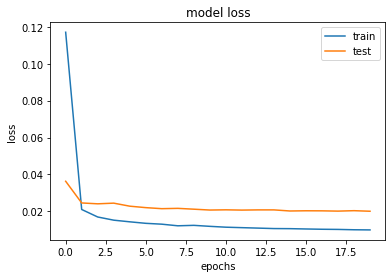

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

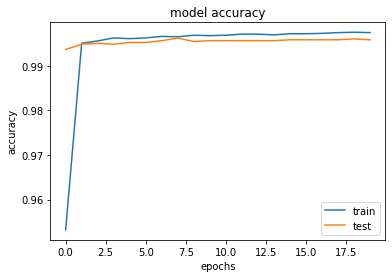

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:

score=model.evaluate(X_test, Y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

159/159 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9959
Test Loss: 0.019994400441646576
Test accuracy: 0.9958539009094238


In [ ]:
print(Y_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
print(Y_test[:,[0]])

[[0.]
 [1.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([[3.6134716e-06, 9.9999642e-01],
       [1.0000000e+00, 1.4800972e-10],
       [1.2398147e-04, 9.9987602e-01],
       ...,
       [9.9999976e-01, 2.4011368e-07],
       [4.9897943e-16, 1.0000000e+00],
       [1.0000000e+00, 1.0529174e-12]], dtype=float32)

In [ ]:
y_pred=y_pred[:,[0]]

In [ ]:
y_prediction=[]
for element in y_pred:
  if element > 5.000e-01:
    y_prediction.append(1)
  else:
    y_prediction.append(0)

In [ ]:
print(classification_report(Y_test[:,[0]],y_prediction))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2500
         1.0       1.00      0.99      1.00      2565

    accuracy                           1.00      5065
   macro avg       1.00      1.00      1.00      5065
weighted avg       1.00      1.00      1.00      5065



ANN Modelling and training of dataset

In [ ]:
#initilising the model
model=Sequential()

#layers
model.add(Dense(units=64,kernel_initializer='glorot_uniform',activation='relu',
                input_dim=(200))) #input layers
#hiddene layers1               
model.add(Dense(units=32,kernel_initializer='glorot_uniform',activation='relu')) 
model.add(Dropout(0.10))

#hidden layers2
model.add(Dense(units=16,kernel_initializer='glorot_uniform',activation='relu')) 
model.add(Dropout(0.20))

#hidden layers3
model.add(Dense(units=8,kernel_initializer='glorot_uniform',activation='relu')) 
model.add(Dropout(0.40))

#hiddene layers4              
model.add(Dense(units=4,kernel_initializer='glorot_uniform',activation='relu')) 
model.add(Dropout(0.50))

#output Layer
model.add(Dense(units=2,kernel_initializer='glorot_uniform',activation='Softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                12864     
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_9 (Dropout)         (None, 8)                

In [ ]:
#compile the model
optimizer = RMSprop(lr=0.01, rho=0.8, epsilon=1e-09, decay=0.1)

model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#training of the model
epochs=20
batch_size=100
history_ann=model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_test, Y_test), verbose = 0)

In [ ]:
history_ann.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_ann.history['val_accuracy']

[0.9936821460723877,
 0.9940770268440247,
 0.9942744374275208,
 0.9940770268440247,
 0.9944718480110168,
 0.9942744374275208,
 0.9942744374275208,
 0.9946693181991577,
 0.9948667287826538,
 0.9948667287826538,
 0.9948667287826538,
 0.9948667287826538,
 0.9948667287826538,
 0.9948667287826538,
 0.9948667287826538,
 0.9948667287826538,
 0.9950641393661499,
 0.9948667287826538,
 0.9950641393661499,
 0.9950641393661499]

In [ ]:
history_ann.history['accuracy']

[0.8149433135986328,
 0.8573362827301025,
 0.8721441626548767,
 0.8934676051139832,
 0.8973599672317505,
 0.9057369828224182,
 0.9051446914672852,
 0.91182941198349,
 0.9133524894714355,
 0.913690984249115,
 0.9185987710952759,
 0.9150448441505432,
 0.9177525639533997,
 0.9170756340026855,
 0.9193602800369263,
 0.9190218448638916,
 0.9190218448638916,
 0.9170756340026855,
 0.9196141362190247,
 0.9186833500862122]

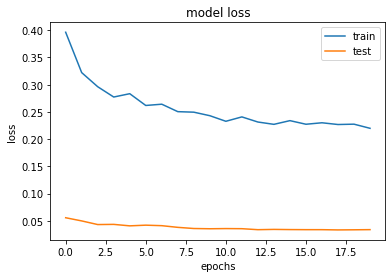

In [ ]:
# summarize history for loss
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

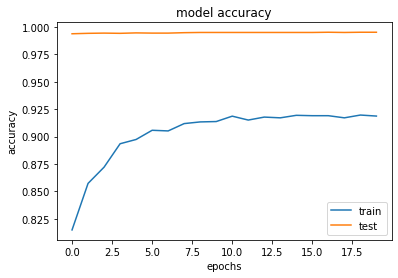

In [ ]:
# summarize history for accuracy
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
score=model.evaluate(X_test, Y_test)

print('Test Loss:', score[0])
print('Test accuracy:', score[1])

159/159 [==============================] - 0s 1ms/step - loss: 0.0338 - accuracy: 0.9951
Test Loss: 0.03375447914004326
Test accuracy: 0.9950641393661499


In [ ]:
print(Y_test)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
y_pred_ann=model.predict(X_test)

In [ ]:
y_pred_ann=y_pred_ann[:,[0]]
y_pred_ann                     

array([[4.3947474e-04],
       [1.0000000e+00],
       [2.0516038e-02],
       ...,
       [1.0000000e+00],
       [2.5904556e-06],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_prediction_ann=[]
for element in y_pred:
  if element > 5.000e-01:
    y_prediction_ann.append(1)
  else:
    y_prediction_ann.append(0)

In [ ]:
print(classification_report(Y_test[:,[0]],y_prediction_ann))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2500
         1.0       1.00      0.99      1.00      2565

    accuracy                           1.00      5065
   macro avg       1.00      1.00      1.00      5065
weighted avg       1.00      1.00      1.00      5065



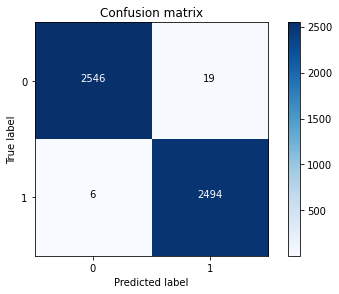

In [ ]:
#confusion Matrix
# Look at confusion matrix 
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred_ann= model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred_ann,axis = 1) 
# Convert validation observations to one hot vectors
Y_true_ann = np.argmax(Y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true_ann, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))